In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data = df.where(pd.notnull(df), '')

In [5]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.loc[data['Category'] == 'spam', 'Category'] = 0
data.loc[data['Category'] == 'ham', 'Category'] = 1

In [7]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


## **Data Cleaning**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
data.isnull().sum()

,0
Category,0
Message,0


In [10]:
data.duplicated().sum()

415

## **Exploratory Data Analysis**

In [11]:
data['Category'].value_counts()

,count
Category,
1,4825
0,747


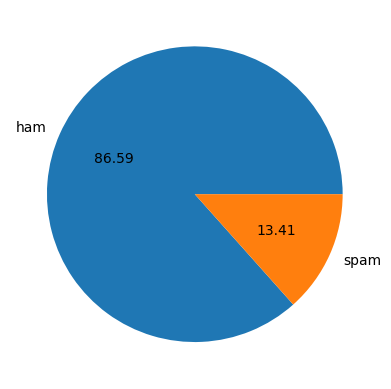

In [12]:
plt.pie(df['Category'].value_counts(), labels = ['ham', 'spam'], autopct = '%.2f')
plt.show()

In [13]:
print(df['Message'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [14]:
arr = []
for i in data['Message']:
  new_text = nltk.word_tokenize(i)
  arr.append(' '.join(new_text))

In [15]:
data['Message'] = pd.Series(arr)

In [16]:
data['num_characters'] = df['Message'].apply(len)

In [17]:
data.head()

,Category,Message,num_characters
0,1,"Go until jurong point , crazy .. Available onl...",111
1,1,Ok lar ... Joking wif u oni ...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor ... U c already then sa...,49
4,1,"Nah I do n't think he goes to usf , he lives a...",61


In [18]:
data['Message'].apply(lambda x: nltk.word_tokenize(x))

,Message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [19]:
data['num_word'] = data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
data['num_sents'] = data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
data.head()

,Category,Message,num_characters,num_word,num_sents
0,1,"Go until jurong point , crazy .. Available onl...",111,24,2
1,1,Ok lar ... Joking wif u oni ...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor ... U c already then sa...,49,13,1
4,1,"Nah I do n't think he goes to usf , he lives a...",61,15,1


In [22]:
data[['num_characters', 'num_word', 'num_sents']].describe()

,num_characters,num_word,num_sents
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.829146,2.055815
std,59.926946,13.856467,1.615735
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [23]:
data[data['Category'] == 1][['num_characters', 'num_word', 'num_sents']].describe()

,num_characters,num_word,num_sents
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.428187,1.889326
std,58.434864,14.122108,1.555956
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
data[data['Category'] == 0][['num_characters', 'num_word', 'num_sents']].describe()

,num_characters,num_word,num_sents
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.131191
std,29.980287,7.036282,1.582047
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


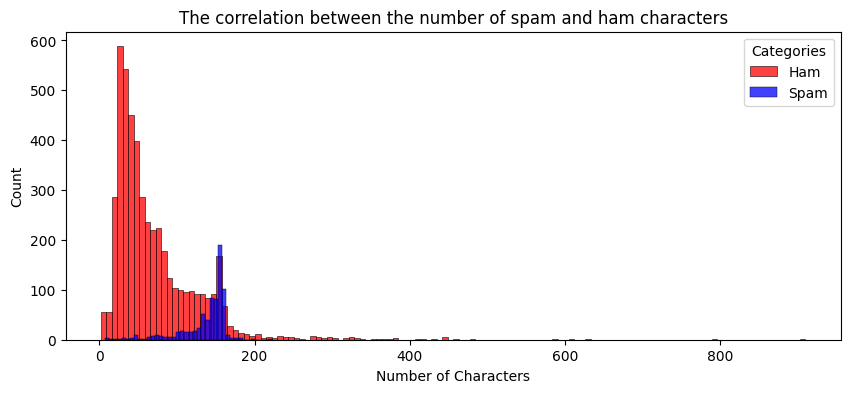

In [25]:
plt.figure(figsize=(10, 4))

sns.histplot(data[data['Category'] == 1]['num_characters'], label='Ham', color='red')
sns.histplot(data[data['Category'] == 0]['num_characters'], label='Spam', color='blue')

plt.title('The correlation between the number of spam and ham characters')
plt.xlabel('Number of Characters')
plt.legend(title='Categories')
plt.show()


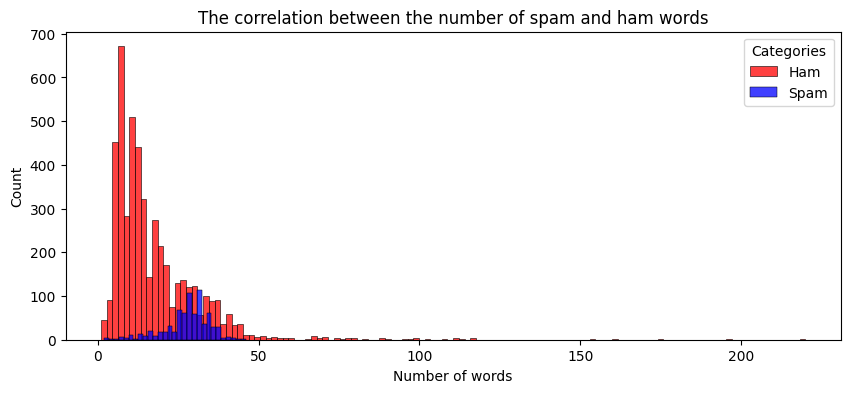

In [26]:
plt.figure(figsize=(10, 4))

sns.histplot(data[data['Category'] == 1]['num_word'], label='Ham', color='red')
sns.histplot(data[data['Category'] == 0]['num_word'], label='Spam', color='blue')

plt.title('The correlation between the number of spam and ham words')
plt.xlabel('Number of words')
plt.legend(title='Categories')
plt.show()


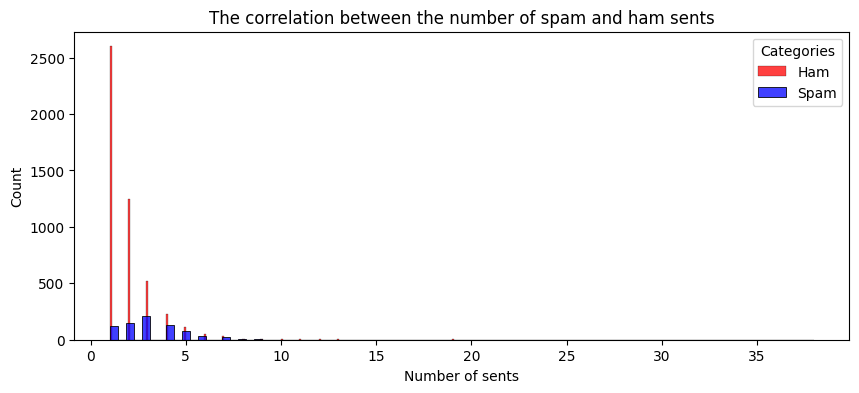

In [27]:
plt.figure(figsize=(10, 4))

sns.histplot(data[data['Category'] == 1]['num_sents'], label='Ham', color='red')
sns.histplot(data[data['Category'] == 0]['num_sents'], label='Spam', color='blue')

plt.title('The correlation between the number of spam and ham sents')
plt.xlabel('Number of sents')
plt.legend(title='Categories')
plt.show()

## **Model Building**

In [28]:
X = data['Message']
y = data['Category']

In [29]:
X

,Message
0,"Go until jurong point , crazy .. Available onl..."
1,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor ... U c already then sa...
4,"Nah I do n't think he goes to usf , he lives a..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home ?
5569,"Pity , * was in mood for that . So ... any oth..."
5570,The guy did some bitching but I acted like i '...


In [30]:
y

,Category
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test) # no fit_tranform to build 1 vocabulary

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [33]:
X_train

,Message
1114,"No I 'm good for the movie , is it ok if I lea..."
3589,If you were/are free i can give . Otherwise na...
3095,Have you emigrated or something ? Ok maybe 5.3...
1012,"I just got home babe , are you still awake ?"
3320,Kay ... Since we are out already
...,...
4931,"Hi , the SEXYCHAT girls are waiting for you to..."
3264,So u gon na get deus ex ?
1653,For ur chance to win a £250 cash every wk TXT ...
2607,R U & SAM P IN EACHOTHER . IF WE MEET WE CAN G...


In [34]:
print(X_train_features)

  (0, 3099)	0.30778739607068667
  (0, 4480)	0.4933198981059812
  (0, 4770)	0.2937599690543961
  (0, 3954)	0.40459749284424307
  (0, 3416)	0.6418008618863358
  (1, 2901)	0.21207121889209815
  (1, 4549)	0.42053679904641994
  (1, 814)	0.44107102567653744
  (1, 2533)	0.44107102567653744
  (1, 4568)	0.44107102567653744
  (1, 3849)	0.44107102567653744
  (2, 4770)	0.2349500626979615
  (2, 2502)	0.5133141633463273
  (2, 4288)	0.36445133334144264
  (2, 432)	0.4077104256374456
  (2, 1316)	0.34462014146959175
  (2, 3392)	0.5133141633463273
  (3, 3772)	0.3142155805011115
  (3, 3116)	0.3576597715450049
  (3, 3372)	0.3860276165866414
  (3, 1159)	0.4492032469845749
  (3, 1137)	0.650036290463599
  (4, 3799)	1.0
  (5, 7372)	0.7984426989330436
  (5, 3725)	0.6020708068994186
  :	:
  (4454, 7004)	0.14040083857773877
  (4454, 1664)	0.21130971337962476
  (4454, 7302)	0.1949753381818719
  (4454, 1620)	0.18784292855815676
  (4454, 6895)	0.21937394005137992
  (4454, 6904)	0.1653057679612594
  (4454, 7334)	0.44

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train_features, y_train)

LogisticRegression()

In [37]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [38]:
accuracy_on_training_data

0.9674669059905766

In [39]:
predict_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, predict_on_test_data)

In [40]:
accuracy_on_test_data

0.9659192825112107

In [41]:
input_your_mail = input('Please enter the content of the email: ').strip()
if not input_your_mail:
  print('Please enter a valid email.')
else:
  input_data_features = feature_extraction.transform([input_your_mail])
  prediction = model.predict(input_data_features)
  if prediction[0] == 0:
    print('Spam mail')
  else:
    print('Ham mail')


Please enter the content of the email: Subject: Congratulations! You've Won a $1000 Gift Card!  Dear Winner,  You have been selected to receive a $1000 gift card from our store! Click the link below to claim your prize:  [Claim Your Prize Now!](http://example.com/fake-link)  This is a limited-time offer, so don't miss out! Act fast and enjoy your shopping spree with us.  Best regards, The Gift Card Team  P.S. If you do not respond within 24 hours, you will forfeit your prize.
Spam mail
